### Task1: Calculating length, area, centroid and Minimum bounding box for simple polygon

In [90]:
import sys, os, math, random, json, numpy
import matplotlib.pyplot as plt

In [89]:
class Point:
    def __init__(self,x,y):
        self.lon = x # defining lon property to point object
        self.lat = y # defining lat property to point object
        
class Polyline:
    def __init__(self, points = []):
        self.points = points
        
    def getLength(self): # Euclidean distance
        Length = 0.0
        for i in range(len(self.points)-1):
            Length += math.sqrt((self.points[i+1].lon-self.points[i].lon)**2 +(self.points[i+1].lat-self.points[i].lat)**2)
        return Length

class Polygon:
    def __init__(self, points = []):
        self.points = points
        
    def getArea(self):
        area = 0.0
        for i in range(len(self.points)-1):
            area += ((self.points[i+1].lon * self.points[i].lat) - (self.points[i].lon * self.points[i+1].lat))
        return abs(area)/2
    
    def getCentroid(self):
        area = self.getArea()
        
        cx = 0.0
        cy = 0.0
        
        for i in range(len(self.points)-1):
            value = ((self.points[i].lon * self.points[i+1].lat)-(self.points[i+1].lon * self.points[i].lat))
            cx += (self.points[i].lon + self.points[i+1].lon) * value
            cy += (self.points[i].lat + self.points[i+1].lat) * value
            
        cx /= 6 * area
        cy /= 6 * area
        
        return (round(cx,2), round(cy,2))
        
    def getEnvelop(self):
        min_lon = min([point.lon for point in self.points])
        min_lat = min([point.lat for point in self.points])
        max_lon = max([point.lon for point in self.points])
        max_lat = max([point.lat for point in self.points])
        return [(min_lon, min_lat), (max_lon, max_lat)]

if __name__ == "__main__":
    pointA=Point(0, 0)
    pointB=Point(3, 0)
    pointC=Point(3, 4)
    pt_list = [pointA,pointB,pointC]
    line= Polyline(pt_list)
    print ("length: ", line.getLength())
    poly = Polygon(pt_list)
    print ("Area: ", poly.getArea())
    print ("Centroid: ", poly.getCentroid())
    print ("Bounding Box: ", poly.getEnvelop())

length:  7.0
Area:  6.0
Centroid:  (2.0, 1.33)
Bounding Box:  [(0, 0), (3, 4)]


### Task 3: K-Means Algorithm

In [70]:
# creating random centroid values from data_points list 
def generate_random_centroid(data_points):
    return data_points[random.randint(0,len(data_points)-1)]

# Euclidean distance between point and centroid
def calculate_distance(point, centroid):
    distance = math.sqrt((point[0]-centroid[0])**2 + (point[1]-centroid[1])**2)
    return distance

# updating centroid with cluster labels (need understanding of this loop ! + what's read and what's happening)
def update_centroid(data_points, cluster_labels, cluster):
    sum_x = 0
    sum_y = 0
    count = 0
    for point in data_points:
        if cluster_labels[point] == cluster:
            sum_x += point[0]
            sum_y += point[1]
            count += 1
    if count > 0:
        return (sum_x/count, sum_y/count)
    else:
        return generate_random_centroid(data_points)

In [71]:
def KMeans_Clustering(k, max_iterations, data_points):
    centroids={} # create an empty dictionary to store centroids of the clusters
    cluster_labels = {} # create an empty dictionary to store the cluster label for each data point
    
    # Initialize random centroids or choose k points from the input data as the initial centroids
    for i in range (k):
        centroids[i] = generate_random_centroid(data_points)
    
    for j in range(max_iterations): 
        # Assignment: K clusters are created by associating each data point with the nearest centroid.
        for eachpoint in data_points:
            dist_min = 99999999
            for i in range (k):
                distance=calculate_distance(eachpoint,centroids[i])
                if distance < dist_min:
                    dist_min=distance
                    cluster_labels[eachpoint]=i
        
        # Update: Iterate each cluster and compute its new centroid based on current assignment
        for i in range (k):
            centroids[i] = update_centroid(data_points, cluster_labels, i)
        return cluster_labels

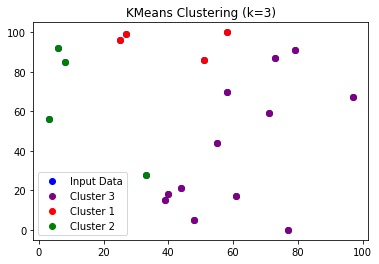

In [84]:
# Generate random data points
data_points = []
total = 20
for i in range(0,total):
    data_points.append((random.randint(0, 100), random.randint(0, 100)))

# Perform KMeans clustering
k = 3
max_iterations = 100
cluster_labels = KMeans_Clustering(k, max_iterations, data_points)

# Separate the data points by their cluster label
clusters = {}
for point, label in cluster_labels.items():
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(point)

# Plot the input data points
x = [data[0] for data in data_points]
y = [data[1] for data in data_points]
plt.scatter(x, y, color='blue', label='Input Data')

# Plot the output clusters
colors = ['red', 'green', 'purple']
for label, points in clusters.items():
    x, y = [val[0] for val in points], [val[1] for val in points]
    plt.scatter(x, y, color=colors[label], label=f'Cluster {label+1}')

plt.title(f'KMeans Clustering (k={k})')
plt.legend()
plt.show()

In [114]:
data_points

[(61, 17),
 (27, 99),
 (73, 87),
 (25, 96),
 (33, 28),
 (3, 56),
 (40, 18),
 (58, 70),
 (97, 67),
 (44, 21),
 (48, 5),
 (77, 0),
 (6, 92),
 (79, 91),
 (8, 85),
 (51, 86),
 (39, 15),
 (58, 100),
 (55, 44),
 (71, 59)]

In [115]:
centroids = {}
for i in range (3):
    centroids[i] = generate_random_centroid(data_points)

In [135]:
centroids={} # create an empty dictionary to store centroids of the clusters
cluster_labels = {} # create an empty dictionary to store the cluster label for each data point
    
# Initialize random centroids or choose k points from the input data as the initial centroids
for i in range (3):
    centroids[i] = generate_random_centroid(data_points)

counter = 0
for j in range(100): 
# Assignment: K clusters are created by associating each data point with the nearest centroid.
    for eachpoint in data_points:
        #print('each point: ', eachpoint)
        dist_min = 99999999
        for i in range(3):
            distance=calculate_distance(eachpoint,centroids[i])
            #print('centroid: ',centroids[i])
            if distance < dist_min:
                dist_min=distance
                #print('distance: ', distance)
                cluster_labels[eachpoint]=i
                counter = counter + 1 
                
print('loop runs: ', counter)

loop runs:  4600


In [136]:
print(f'cluster_labels : {cluster_labels},\n \n centroids: {centroids}')

cluster_labels : {(61, 17): 2, (27, 99): 1, (73, 87): 1, (25, 96): 1, (33, 28): 2, (3, 56): 2, (40, 18): 2, (58, 70): 1, (97, 67): 0, (44, 21): 2, (48, 5): 2, (77, 0): 2, (6, 92): 1, (79, 91): 0, (8, 85): 1, (51, 86): 1, (39, 15): 2, (58, 100): 1, (55, 44): 1, (71, 59): 1},
 
 centroids: {0: (97, 67), 1: (71, 59), 2: (39, 15)}
